# Import Necessary Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


#for preprocessing
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Regression Models 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

#DL Model 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

# Read Data & Check Missing Values

In [2]:
df = pd.read_csv(r"C:\Users\Ahmed Ashraf\Downloads\archive (7)\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.duplicated().sum()

0

# -	Visualization Dataset 

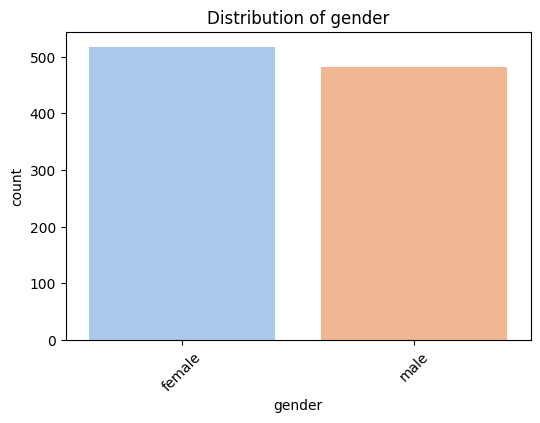

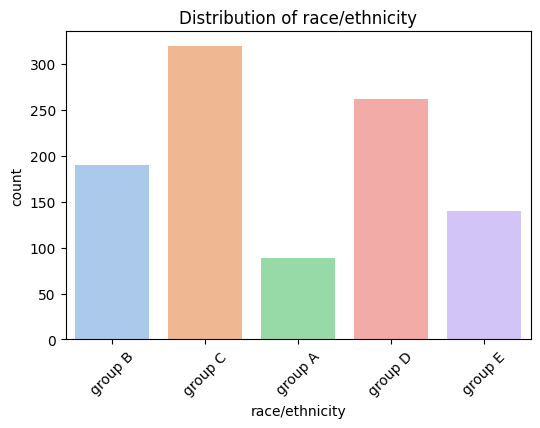

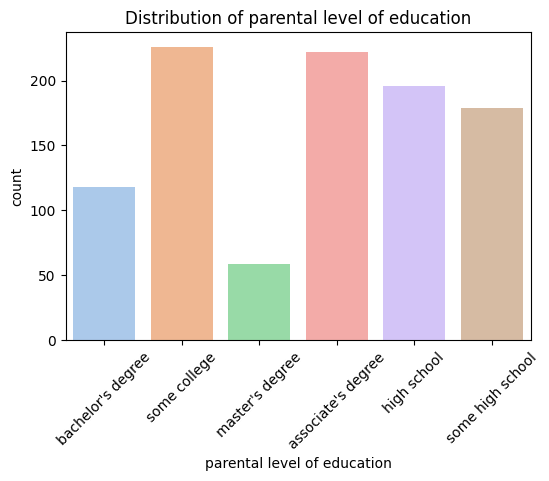

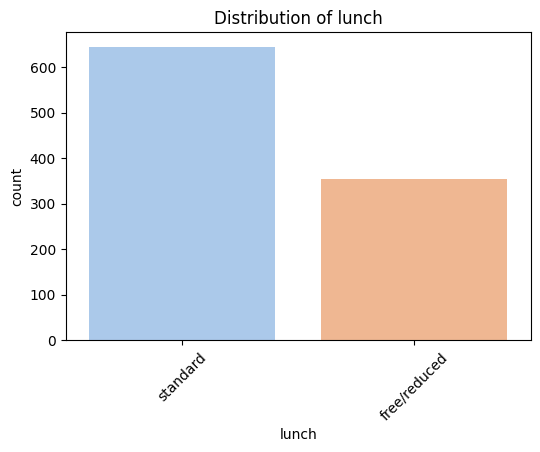

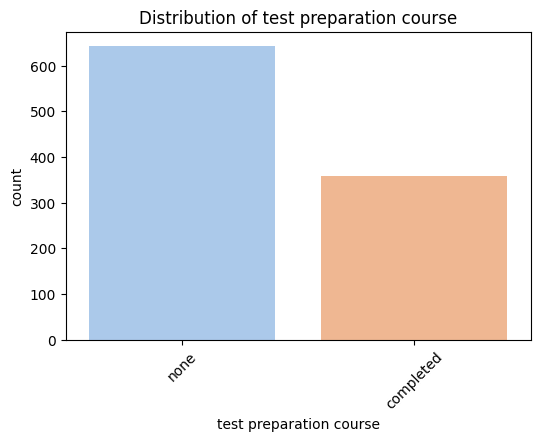

In [7]:
#For Categorical Columns 
for i in df.select_dtypes(include='object'):
    plt.figure(figsize=(6 , 4))
    sns.countplot(data = df , x = i , palette='pastel')
    plt.title(f'Distribution of {i}' , )
    plt.xticks(rotation=45)
    plt.show()


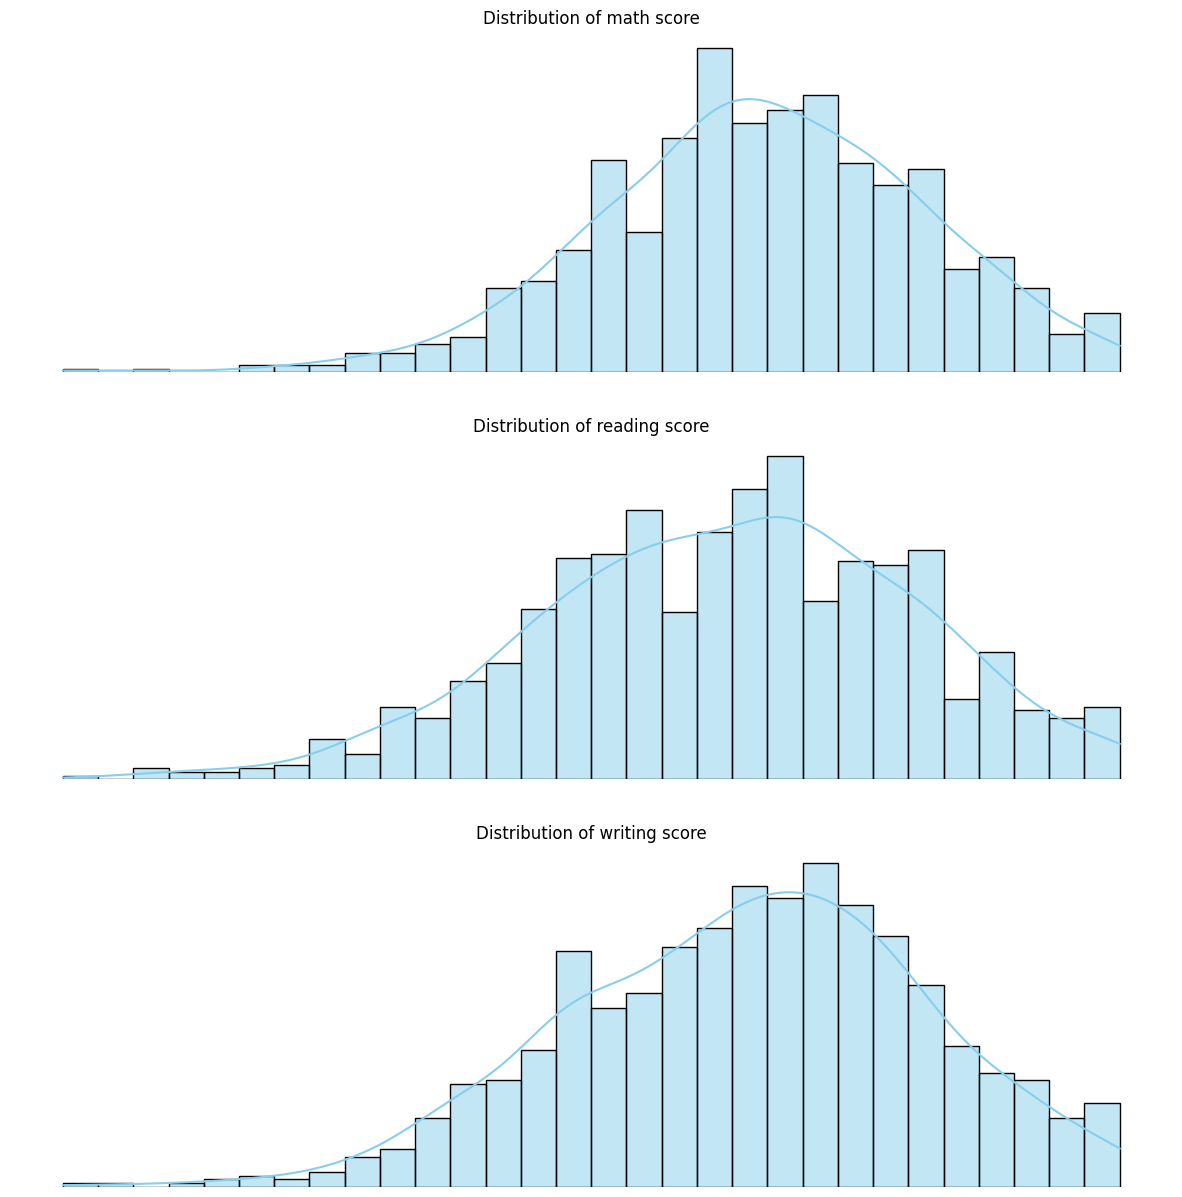

In [8]:
#For Numerical Columns
numerical_col = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 5 * len(numerical_col)))
for i, col in enumerate(numerical_col, 1):
    plt.subplot(len(numerical_col), 1, i) 
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.axis('off') 


# Checking for outliers using IQR method 

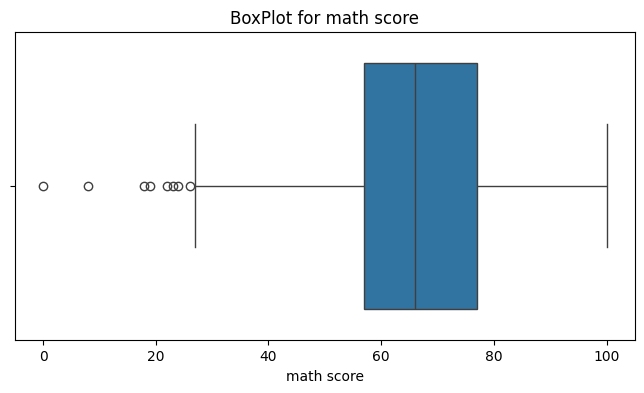

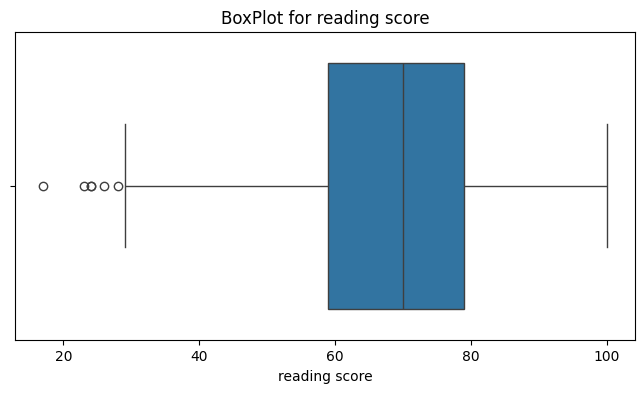

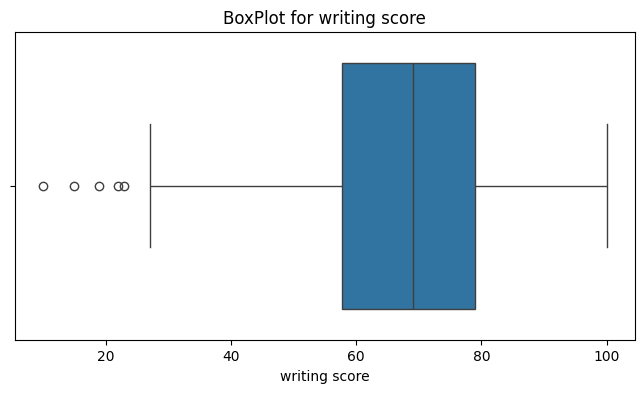

In [9]:
#Loop through numerical columns and create boxplots
numeric_columns = df.select_dtypes(include='number').columns
for col in numeric_columns : 
    plt.figure(figsize=(8 , 4))
    sns.boxplot(data=df , x=col)        #Create boxplot for each column
    plt.title(f'BoxPlot for {col}')       #Add title
    plt.show()

# Preprocessing Step

In [10]:
# Apply Encoding ---> (LabelEncoder)
encoder = LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i]=encoder.fit_transform(df[i])

In [11]:
#Apply Scaling --->(MinMaxScaler)
scaler = MinMaxScaler() 

df[df.columns] = scaler.fit_transform(df)



In [12]:
#Remove Outliers 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5*IQR 
upper_bound = Q3 + 1.5*IQR

df_no_outliers = df[~((df < lower_bound) | ( df > upper_bound)).any(axis=1)]

print(f'Original dataset Shape : {df.shape}')
print(f'Dataset size after removing outliers {df_no_outliers.shape}')

Original dataset Shape : (1000, 8)
Dataset size after removing outliers (984, 8)


# Split Data into Train & Test   ------> (80% : 20%)

In [13]:
y = df['math score'] 
x = df.drop(columns=['math score'] , axis= 1 )

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42 , shuffle=True)

In [15]:
#Check
print("X_Test Shape = " , x_test.shape)
print("Y_Test Shape = " , y_test.shape)
print("X_Train Shape = " , x_train.shape)
print("Y_Train Shape = " , y_train.shape)

X_Test Shape =  (200, 7)
Y_Test Shape =  (200,)
X_Train Shape =  (800, 7)
Y_Train Shape =  (800,)


# Build Various Model of Regression 

In [16]:
models = {
    "Linear_Regression": LinearRegression(),
    "RandomForest_Regressor": RandomForestRegressor(),
    "GradientBoosting_Regressor": GradientBoostingRegressor(),
    "DecisionTree_Regressor": DecisionTreeRegressor(),
    "SVM": SVR(),
}

In [17]:
#Dictionary to store results
results = {'Model': [], 'MSE': [], 'MAE': [], 'R²': []}

for i in models : 
    obj = models[i]
    obj.fit(x_train , y_train) 
    obj_pred = obj.predict(x_test) 
    
    #Calculate Metrics
    mse = mean_squared_error(y_test, obj_pred)
    mae = mean_absolute_error(y_test, obj_pred)
    r2 = r2_score(y_test, obj_pred)
    
    
    #Store results in the dictionary
    results['Model'].append(i)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R²'].append(r2)

#Convert results to a DataFrame
results_df = pd.DataFrame(results)

#Display the results
print(results_df)

                        Model       MSE       MAE        R²
0           Linear_Regression  0.002828  0.041301  0.883803
1      RandomForest_Regressor  0.003743  0.047380  0.846167
2  GradientBoosting_Regressor  0.003097  0.042944  0.872732
3      DecisionTree_Regressor  0.005979  0.059450  0.754313
4                         SVM  0.004358  0.050538  0.820902


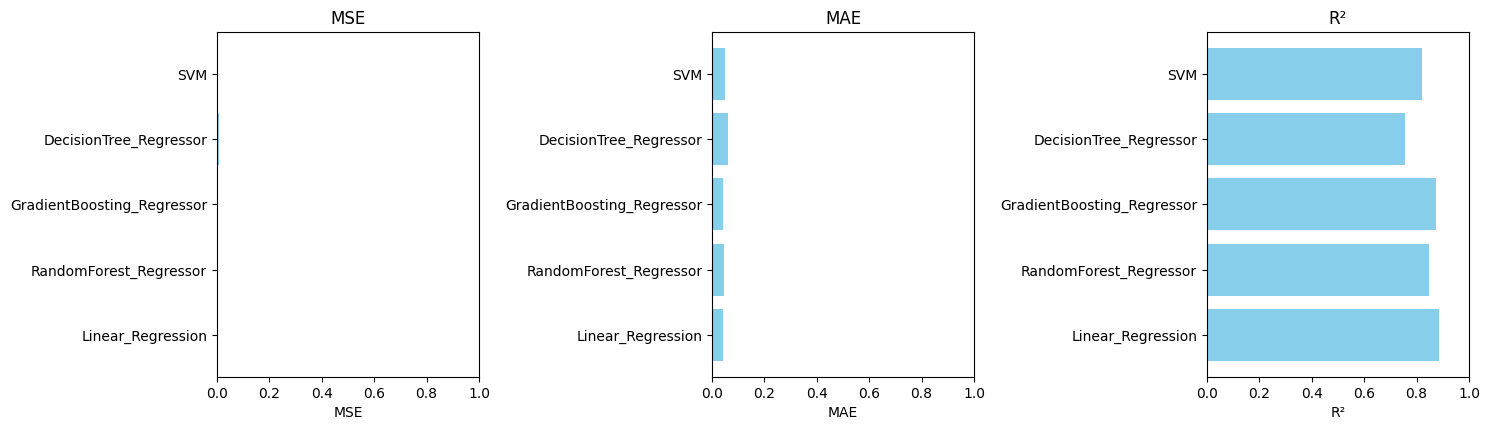

In [18]:
#Plotting each metric
metrics = ['MSE', 'MAE', 'R²']

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.barh(results_df['Model'], results_df[metric], color='skyblue')
    plt.title(metric)
    plt.xlim(0, 1)
    plt.xlabel(metric)

plt.tight_layout()
plt.show()


# Now Building DL Model 

In [19]:
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [20]:
#Compile the model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [22]:
#Train the model
history = nn_model.fit(x_train, y_train, 
                      validation_data=(x_test, y_test),
                      epochs=25, batch_size=32, verbose=1)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 - mae: 0.0412 - val_loss: 0.0034 - val_mae: 0.0429
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - mae: 0.0403 - val_loss: 0.0036 - val_mae: 0.0442
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - mae: 0.0405 - val_loss: 0.0033 - val_mae: 0.0422
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 - mae: 0.0420 - val_loss: 0.0034 - val_mae: 0.0438
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - mae: 0.0405 - val_loss: 0.0036 - val_mae: 0.0435
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - mae: 0.0407 - val_loss: 0.0034 - val_mae: 0.0433
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - mae: 0.0416 - val_loss: 0.0035 - val_mae: 0.0450
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - mae: 0.0409 - val_loss: 0.0035 - val_mae: 0.0444
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - mae: 

In [23]:
#Evaluate Neural Network
y_pred_nn = nn_model.predict(x_test).flatten()
results['Neural Network'] = {
    'MSE': mean_squared_error(y_test, y_pred_nn),
    'MAE': mean_absolute_error(y_test, y_pred_nn),
    'R²': r2_score(y_test, y_pred_nn)
}

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


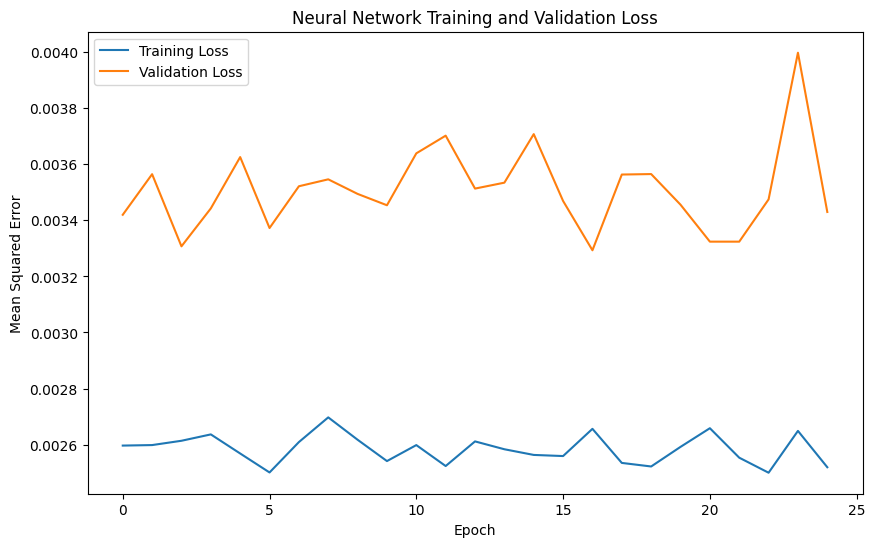

In [29]:
#Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step


Text(0.5, 1.0, 'Neural Network: Actual vs Predicted Math Scores')

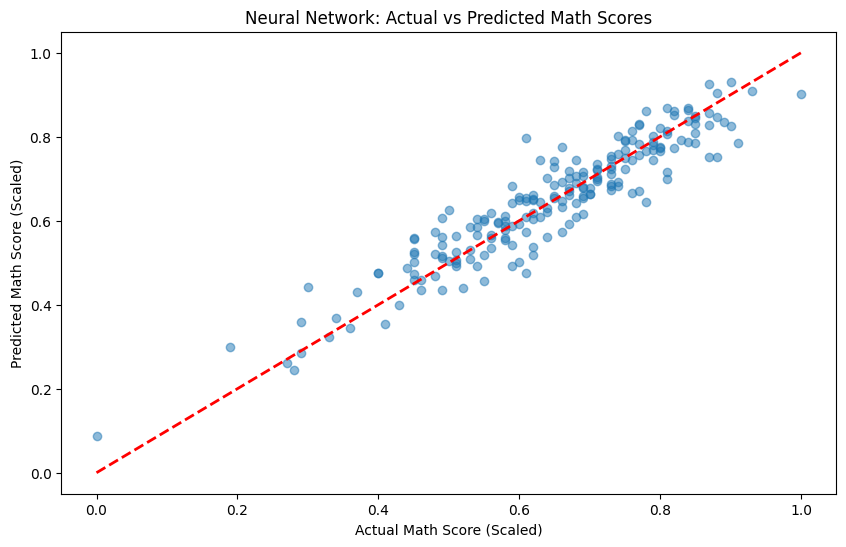

In [30]:
#Plot test predictions vs actual values
y_pred = nn_model.predict(x_test).flatten()
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Math Score (Scaled)')
plt.ylabel('Predicted Math Score (Scaled)')
plt.title('Neural Network: Actual vs Predicted Math Scores')


# Visualize feature importance for RandomForest (tree-based model)


In [31]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [32]:
#Identify categorical and numerical columns
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical_cols = ['reading score', 'writing score']

In [33]:
feature_names = categorical_cols + numerical_cols


In [34]:
#Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

In [35]:
#Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

Text(0.5, 1.0, 'Random Forest Feature Importance')

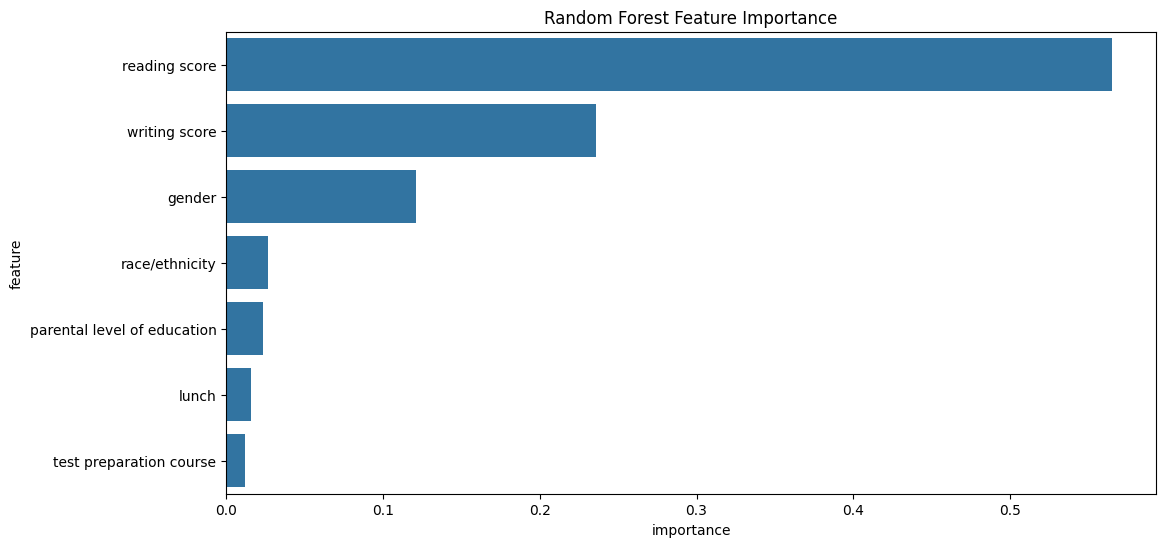

In [37]:
#Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')

# Hyperparameter Tuning for RandomForest with GridSearchCV


In [38]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [39]:
#Print best parameters and score
print("Best RandomForest Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best RandomForest Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best R² Score: 0.839872775042099


In [41]:
#Save the best RandomForest model
joblib.dump(grid_search.best_estimator_, 'best_rf_model.pkl')

['best_rf_model.pkl']

# Explore My Kaggle Portfolio

Discover my diverse range of data science and machine learning projects on [Kaggle](https://www.kaggle.com/ahmedashraf299). 

As a **Kaggle Master**, I bring advanced expertise in solving complex problems, creating insightful notebooks, and sharing innovative solutions. Explore my work and join me in the pursuit of data-driven excellence!
